In [39]:
from scipy.optimize import least_squares
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt




In [40]:
Infected_full_base = [2,
2,
2,
2,
3,
2,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
3,
4,
5,
6,
6,
9,
26,
74,
248,
650,
936,
1321,
1698,
1760,
1877,
1973,
2065,
2176,
2284,
2404,
2523,
2652,
2780,
2955,
3135,
3305,
3463,
3669,
3905,
4137,
4306,
4611,
4844,
5133,
5348,
5479,
5623,
5953,
6158,
6503,
7162,
7533,
8197,
8744,
9048,
9301,
9587,
9857,
10074,
10232,
10356,
10689,
10855,
11115,
11370,
11687,
11875,
12069,
12375,
12736,
13098,
13820,
14106,
14241,
14407,
14800,
15127,
15505,
15918,
16280,
16698,
17340,
18019,
18512,
18869,
19240,
19607,
19814,
20020,
20413,
20857,
21463,
21831,
22218,
22575,
22822,
23217,
23703,
24271,
24805,
25333,
25673,
26071,
26553,
26987,
27541,
28298,
29034,
29435,
29732,
30665,
31511,
32692,
33785,
34335,
34698,
35132,
35879,
36583,
37503,
38302,
38994,
39768,
40293,
41244,
42303,
43381,
44812,
46061,
46880,
47588,
49638,
51585,
53608,
55305,
57177,
58700,
59905,
62207,
64436,
66546,
69346,
71998,
73927,
75692,
77795,
79860,
82397,
85293,
88363,
90232,
91496,
94553,
97775,
101023,
104664,
108088,
110432,
111905,
115700,
118992,
122019,
125727,
128546,
131151,
133054,
136712,
141039,
144488,
148191,
151994,
154875,
157268,
163050,
167111,
171584,
175334,
180144,
182973,
185101,
189362,
193440,
197639,
201832,
205429,
208407,
210164,
214854,
218528,
222824,
226710,
230409,
233218,
235583,
238295,
242101,
245592,
249099,
252996,
255111,
256884,
259444,
262910,
266487,
270126,
273299,
276261,
278331,
282327,
286146,
289547,
292866,
296011,
298525,
300348,
303359,
305866,
308699,
311181,
314009,
315790,
317346,
320241,
322790,
325494,
328152,
330423,
332391,
334073,
336750,
339319,
342064,
344397,
346995,
348693,
350360,
353426,
355733,
357720,
359840,
362045,
363576,
364798,
367225,
369310,
371126,
373033,
374884,
376305,
377425,
379247,
381035,
383107,
385088,
387266,
388491,
389530,
391159,
393551,
395213,
397168,
399265,
400674,
401987,
404250,
406097,
407832,
409178,
410728,
411950,
412947,
414935,
416460,
418085,
419636,
421191,
422267,
423271,
425106,
426719,
428293,
429919,
431549,
432716,
433686,
434839,
436580,
438185,
439786,
441382,
442512,
443444,
445291,
446436,
448036,
449559,
451056,
452175,
452889,
454711,
456293,
457876,
459468,
461172,
462334,
463420,
465657,
467161,
468386,
469272,
470027,
471197,
471993,
473869,
475347,
476378,
477292,
478220,
479471,
480695,
482946,
485448,
488335,
491368,
494180,
495509,
496658,
498952,
500873,
502684,
504681,
506753,
508056,
509068,
511527,
513351,
515123,
517031,
519000,
520216,
521378,
523448,
525346,
527426,
529153,
531074,
532372,
533525,
535597,
537356,
539267,
541316,
543745,
546096,
548373,
552275,
553855,
555672,
557622,
559133,
560363,
561443,
563604,
565381,
567134,
569126,
571185,
572678,
573859,
576594,
578850,
581090,
583061,
585849,
587828,
589331,
592467,
595293,
598077,
601519,
606504,
610212,
613038,
619076,
623033,
627465,
632371,
638043,
642691,
646071,
653517,
660304,
667723,
675169,
683301,
689583,
693910,
704154,
713155,
722538,
732897,
745008,
753241,
759251,
771647,
784090,
795261,
802953,
810560,
819079,
825420,
840077,
853787,
865408,
878524,
889228,
897916,
903977,
916859,
927904,
938229,
948567,
959301,
966343,
971470,
981985,
990632,
999557,
1008410,
1017064,
1023250,
1027753,
1037464,
1046108,
1054014,
1061926,
1070212,
1075307,
1079219,
1087907,
1095066,
1101660,
1108575,
1116357,
1121282,
1124621,
1132365,
1138500,
1144826,
1149654,
1156669,
1160996,
1164345,
1171813,
1178375,
1184508,
1190918,
1197527,
1201501,
1204122,
1212123,
1218703,
1225160,
1231971,
1239749,
1244591,
1248042,
1256560,
1263764,
1270026,
1277048,
1284400,
1288973,
1292738,
1302354,
1309977,
1316865,
1324116,
1331059,
1335398,
1338954,
1347413,
1353811,
1359794,
1366358,
1372351,
1376022,
1378545,
1386151,
1392264,
1398165,
1404007,
1409975,
1413834,
1416840,
1423970,
1429879,
1435719,
1441206,
1447139,
1450742,
1453709,
1460728,
1465903,
1471060,
1476669,
1481880,
1485329,
1488061,
1494378,
1499577,
1505059,
1510509,
1516533,
1520456,
1523298,
1530696,
1535203,
1542041,
1548064,
1555119,
1559208,
1562297,
1571094,
1578658,
1586007,
1593536,
1603048,
1609276,
1614151,
1625825,
1636237,
1646639,
1657319,
1669126,
1677656,
1683600,
1698934,
1712627,
1726688,
1741592,
1757815,
1768105,
1775692,
1795555,
1813888,
1831089,
1848464,
1867702,
1878893,
1886634,
1908725,
1928784,
1948577,
1967078,
1985049,
1995954,
2001516,
2003911,
2003931,
2003955,
2020258,
2040343,
2060965,
2080916,
2103296,
2121297,
2139072,
2161806,
2179718,
2205956,
2227326,
2248010,
2266022,
2282931,
2304139,
2324416,
2347478,
2366679,
2385555,
2401827,
2417342,
2434669,
2453268,
2470103,
2490858,
2509177,
2522927,
2535680,
2549921,
2565387,
2580126,
2593292,
2604015,
2613049,
2622917,
2632881,
2643440,
2654403,
2666522,
2674757,
2683274,
2690397,
2698232,
2705737,
2713455,
2720343,
2727239,
2731713,
2735305,
2740111,
2745860,
2751644,
2756902,
2761279,
2765631,
2768797,
2772491,
2779888,
2783866,
2787258,
2790353,
2792307,
2793876,
2795642,
2797965,
2800608,
2803207,
2805285,
2806665,
2809274,
2811248,
2813083,
2815154,
2816964,
2818492,
2819304,
2820456,
2821753,
2823025,
2824183,
2825869,
2826667,
2827770,
2828643,
2829601,
2830278,
2830969,
2831710,
2832309,
2832538,
2832909,
2833473,
2833777,
2834172,
2834611,
2834989,
2835223,
2835434,
2835996,
2836004,
2836190,
2836443,
2836633,
2836678,
2836727,
2837016,
2837264,
2837374,
2837467,
2837551,
2837551,
2837615,
2837727,
2837948,
2838207,
2838474,
2838690,
2838901,
2839637,
2841018,
2843869,
2847331,
2851735,
2855685,
2860970,
2871697,
2888845,
2910417,
2936740,
2965361,
2998466,
3026388,
3058388,
3092305,
3129375,
3168242,
3205304,
3242287,
3270667,
3293305,
3324339,
3356972,
3387388,
3417118,
3441969,
3459504,
3475256,
3493447,
3511414,
3528727,
3545656,
3560172,
3569637,
3576759,
3585461,
3593782,
3601207,
3609552,
3616059,
3619525,
3623000,
3626849,
3630576,
3634230,
3637212,
3639930,
3641926,
3644597,
3646793,
3648825,
3650491,
3652099,
3653265,
3654175,
3655597,
3657342,
3658797,
3660011,
3661046,
3661992,
3663054,
3663916,
3664894,
3665737,
3666672,
3667535,
3668268,
3668348,
3668348,
3668940,
3669522,
3670175,
3670739,
3671293,
3671676,
3672063,
3672661,
3673192,
3673709,
3674279,
3674693,
3674977,
3675379,
3675821,
3676228,
3676661,
3676989,
3677370,
3677612,
3677793,
3677793,
3678141,
3678509,
3679175,
3679443,
3679665,
3679923,
3680191,
3680476,
3680774,
3681046,
3681316,
3681516,
3681742,
3682013,
3682280,
3682499,
3682693,
3682861,
3683016,
3683374,
3683503,
3683728,
3683930,
3684130,
3684341,
3684462,
3684654,
3684841,
3685023,
3685256,
3685507,
3685693,
3685826,
3685984,
3686152,
3686302,
3686475,
3686624,
3686802,
3686928,
3687037,
3687176,
3687355,
3687526,
3687729,
3687887,
3687997,
3688100,
3688295,
3688505,
3688750,
3688941,
3689132,
3689281,
3689457,
3689656,
3689856,
3690054,
3690254,
3690448,
3690581,
3690707,
3690889,
3691114,
3691327,
3691545,
3691724,
3691892,
3692084,
3692336,
3692336,
3692914,
3693222,
3693608,
3693865,
3694104,
3694529,
3694529,
3695652,
3696264,
3696791,
3697200,
3697793,
3698509,
3698509,
3700028,
3700876,
3701743,
3702319,
3703098,
3704407,
3704407,
3706948,
3708198,
3709313,
3710070,
3711195,
3713131,
3713131,
3716449,
3718394,
3720050,
3721410,
3723011,
3725382,
3725382,
3730541,
3733098,
3735381,
3737086,
3739159,
3741987,
3741987,
3748877,
3752625,
3755402,
3757761,
3760488,
3764346,
3764346,
3772468,
3776625,
3780176,
3782822,
3785870,
3790309,
3790309,
3799334,
3803953,
3808154,
3810771,
3813947,
3818480,
3818480,
3827759,
3831938,
3835429,
3838051,
3840950,
3844708,
3844708,
3852161,
3855761,
3858802,
3860454,
3863945,
3867071,
3867071,
3872323,
3874537,
3877062,
3878671,
3880190,
3883957,
3883957,
3889097,
3891371,
3893514,
3894791,
3896478,
3898882,
3906257,
3906257,
3906257,
3908198,
3909778,
3911487,
]

Sus_full_base = [100979303 - element for element in Infected_full_base]

In [41]:
Sus_full = [element/100979303 for element in Sus_full_base]
Infected_full = [element/100979303 for element in Infected_full_base]
Total_days_full = [i for i in range(0,len(Sus_full))]

In [58]:
Infected_full[-1]

0.03873553177525894

In [42]:
print(len(Sus_full))

959


In [43]:
S0 = 1  # Initial number of susceptible individuals
I0 = Infected_full_base[0]/100979303  # Initial number of infected individuals
Y0 = [S0, I0]

def covid(t, U, beta, nu):
    S, I = U
    dSdt = -beta * S * I
    dIdt = beta * S * I - nu * I
    return [dSdt, dIdt]

def residue(paras):
    beta, nu = paras
    sol = solve_ivp(
        lambda t, U: covid(t, U, beta, nu),
        t_span=(0, len(Total_days_full)),
        y0=Y0,
        t_eval=Total_days_full,
        vectorized=True,
        dense_output=True
    )
    S_res = Sus_full - sol.y[0]
    I_res = Infected_full - sol.y[1]
    return np.concatenate([S_res, I_res])

initial_guess = [0.5, 0.2]

In [44]:
opt_para = least_squares(residue, initial_guess)

In [45]:
beta_opt, nu_opt = opt_para.x
print("beta optimized is: " + str(opt_para.x[0])[0:8])
print("nu optimized is: " + str(opt_para.x[1])[0:8])

sol_optimized = solve_ivp(
    lambda t, U: covid(t, U, beta_opt, nu_opt),
    t_span=(0, Total_days_full[-1] + 1),
    y0=Y0,
    t_eval=Total_days_full,
    vectorized=True
)

beta optimized is: 1.161944
nu optimized is: 1.141999


In [55]:

S = sol_optimized.y[0]  # Susceptibles
I = sol_optimized.y[1]  # Infected
T = sol_optimized.t     # Time

R_0 = 1/nu_opt * beta_opt
print("The R_0 value is: " + str(R_0)[0:6])

p = 1 - 1/R_0

print(str(p*100)[0:6] + "%")

minimum_vac = p*100
print("minimum needed to be vaccinated: " + str(minimum_vac)[0:6] + "%")

max_infected = max(I)

print("the maximum number of infected predicted to be alive at the same time was: " + str(int(max_infected*Sus_full_base[0])))

The R_0 value is: 1.0174
1.7164%
minimum needed to be vaccinated: 1.7164%
the maximum number of infected predicted to be alive at the same time was: 14993


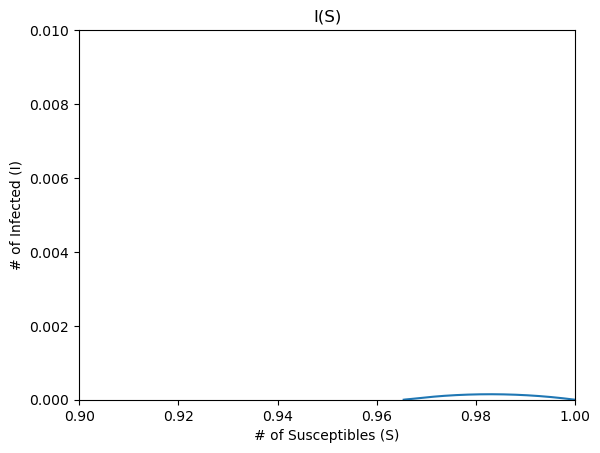

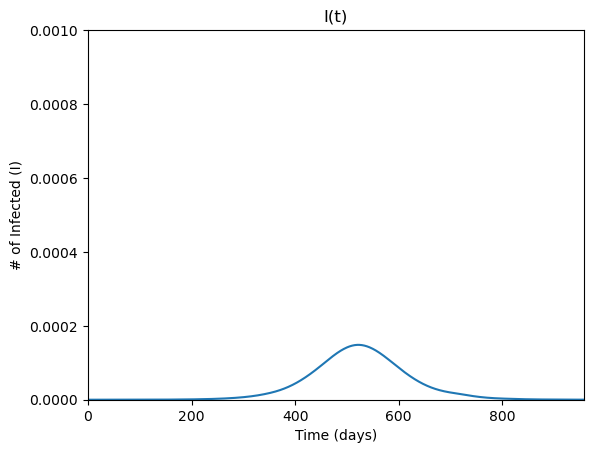

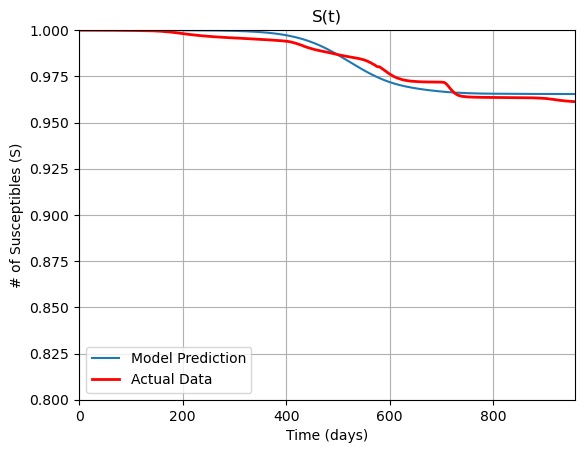

In [54]:

plt.figure()
plt.plot(S, I)
plt.xlabel('# of Susceptibles (S)')
plt.ylabel('# of Infected (I)')
plt.title('I(S)')
plt.axis([0.9, 1, 0, 0.01])
plt.show()

plt.figure()
plt.plot(T, I)
plt.xlabel('Time (days)')
plt.ylabel('# of Infected (I)')
plt.title('I(t)')
plt.axis([0, Total_days_full[-1], 0, 0.001])
plt.show()

plt.figure()
plt.plot(T, S, label="Model Prediction")
plt.plot(Total_days_full, Sus_full, color='red', linestyle='-', label="Actual Data", linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('# of Susceptibles (S)')
plt.axis([0, Total_days_full[-1], 0.8, 1])  
plt.title('S(t)')
plt.legend()
plt.grid(True)